In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [4]:
train_df = pd.read_csv('/content/Traning disease data.csv')
test_df = pd.read_csv('/content/Testing disease data.csv')

In [5]:
train_df.head(20)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          1                     1                    0          0   
2         1          0                     1                    0          0   
3         1          1                     0                    0          0   
4         1          1                     1                    0          0   
5         0          1                     1                    0          0   
6         1          0                     1                    0          0   
7         1          1                     0                    0          0   
8         1          1                     1                    0          0   
9         1          1                     1                    0          0   
10        0          0                     0                    1          1   
11        0          0                     0                    0          1   
12        0          0                     0                    1          0   
13        0          0                     0                    1          1   
14        0          0                     0                    1          1   
15        0          0                     0                    0          1   
16        0          0                     0                    1          0   
17        0          0                     0                    1          1   
18        0          0                     0                    1          1   
19        0          0                     0                    1          1   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0        0           0             0        0                 0  ...   
1        0           0             0        0                 0  ...   
2        0           0             0        0                 0  ...   
3        0           0             0        0                 0  ...   
4        0           0             0        0                 0  ...   
5        0           0             0        0                 0  ...   
6        0           0             0        0                 0  ...   
7        0           0             0        0                 0  ...   
8        0           0             0        0                 0  ...   
9        0           0             0        0                 0  ...   
10       1           0             0        0                 0  ...   
11       1           0             0        0                 0  ...   
12       1           0             0        0                 0  ...   
13       0           0             0        0                 0  ...   
14       1           0             0        0                 0  ...   
15       1           0             0        0                 0  ...   
16       1           0             0        0                 0  ...   
17       0           0             0        0                 0  ...   
18       1           0             0        0                 0  ...   
19       1           0             0        0                 0  ...   

    scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0          0             0                    0                     0   
1          0             0                    0                     0   
2          0             0                    0                     0   
3          0             0                    0                     0   
4          0             0                    0                     0   
5          0             0                    0                     0   
6          0             0                    0                     0   
7          0             0                    0                     0   
8          0             0                    0                     0   
9          0             0                    0                     0   
10     

In [6]:
test_df.head(20)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          0                     0                    1          1   
2         0          0                     0                    0          0   
3         1          0                     0                    0          0   
4         1          1                     0                    0          0   
5         0          0                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                     0                    0          0   
12        0          0                     0                    0          0   
13        0          0                     0                    0          0   
14        1          0                     0                    0          0   
15        0          0                     0                    0          0   
16        1          1                     0                    0          0   
17        0          1                     0                    0          0   
18        0          0                     0                    0          0   
19        0          0                     0                    0          0   

    chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0        0           0             0        0                 0  ...   
1        1           0             0        0                 0  ...   
2        0           0             1        1                 1  ...   
3        0           0             0        0                 0  ...   
4        0           0             1        0                 0  ...   
5        0           0             0        0                 0  ...   
6        0           0             0        0                 0  ...   
7        0           0             0        0                 0  ...   
8        0           0             0        0                 0  ...   
9        0           0             0        0                 0  ...   
10       0           0             0        0                 0  ...   
11       0           0             0        1                 0  ...   
12       0           0             0        0                 0  ...   
13       0           0             0        0                 0  ...   
14       0           0             0        0                 0  ...   
15       1           0             0        0                 0  ...   
16       0           0             0        0                 0  ...   
17       1           1             0        0                 0  ...   
18       1           0             0        0                 0  ...   
19       0           1             0        0                 0  ...   

    blackheads  scurring  skin_peeling  silver_like_dusting  \
0            0         0             0                    0   
1            0         0             0                    0   
2            0         0             0                    0   
3            0         0             0                    0   
4            0         0             0                    0   
5            0         0             0                    0   
6            0         0             0                    0   
7            0         0             0                    0   
8            0         0             0                    0   
9            0         0             0                    0   
10           0         0             0                    0   
11           0         0             0                

In [7]:
print("Missing values in training data:")
print(train_df.isnull().sum())

Missing values in training data:
itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


In [8]:
print("\nTraining data description:")
print(train_df.describe())



Training data description:
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007

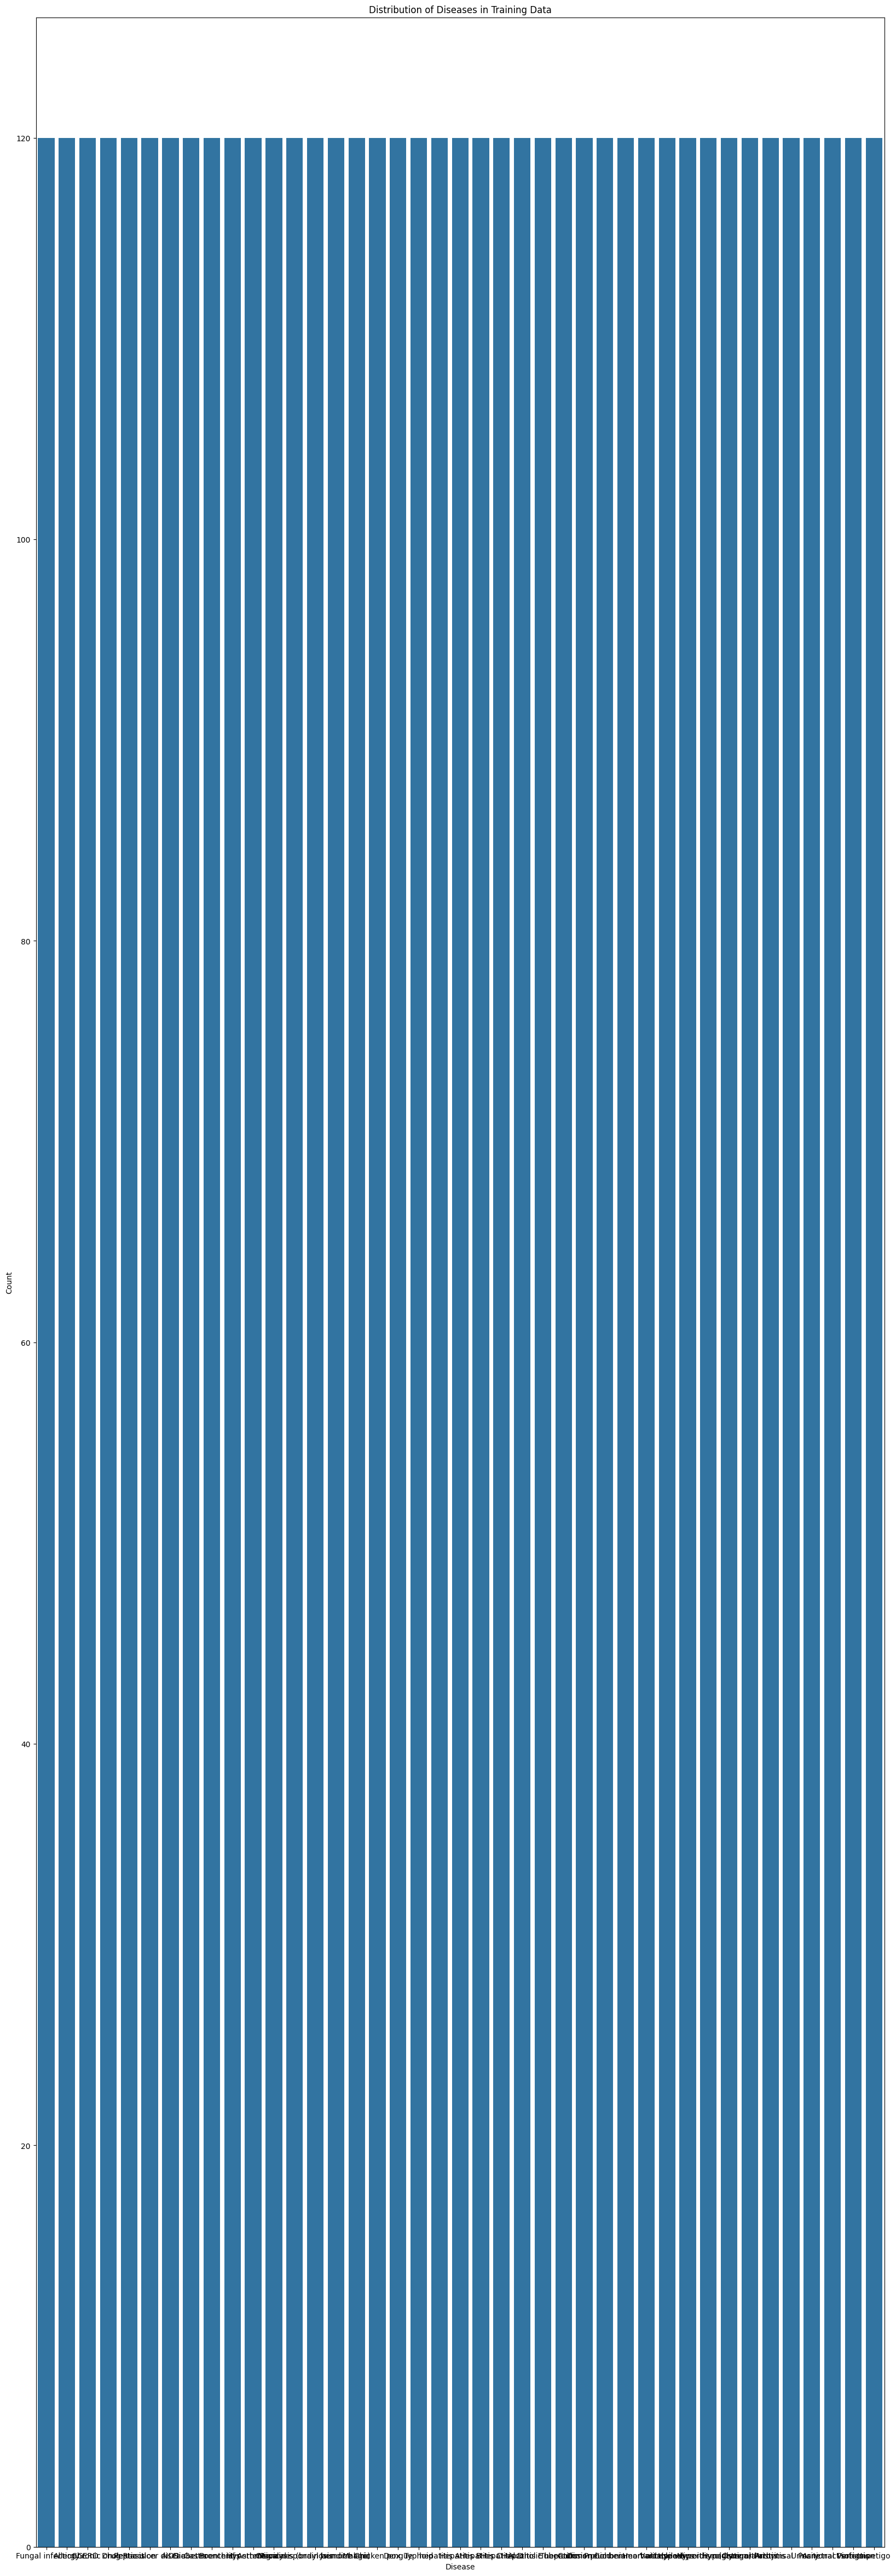

In [12]:
plt.figure(figsize=(20, 60))
sns.countplot(data=train_df, x='prognosis')
plt.title("Distribution of Diseases in Training Data")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.show()

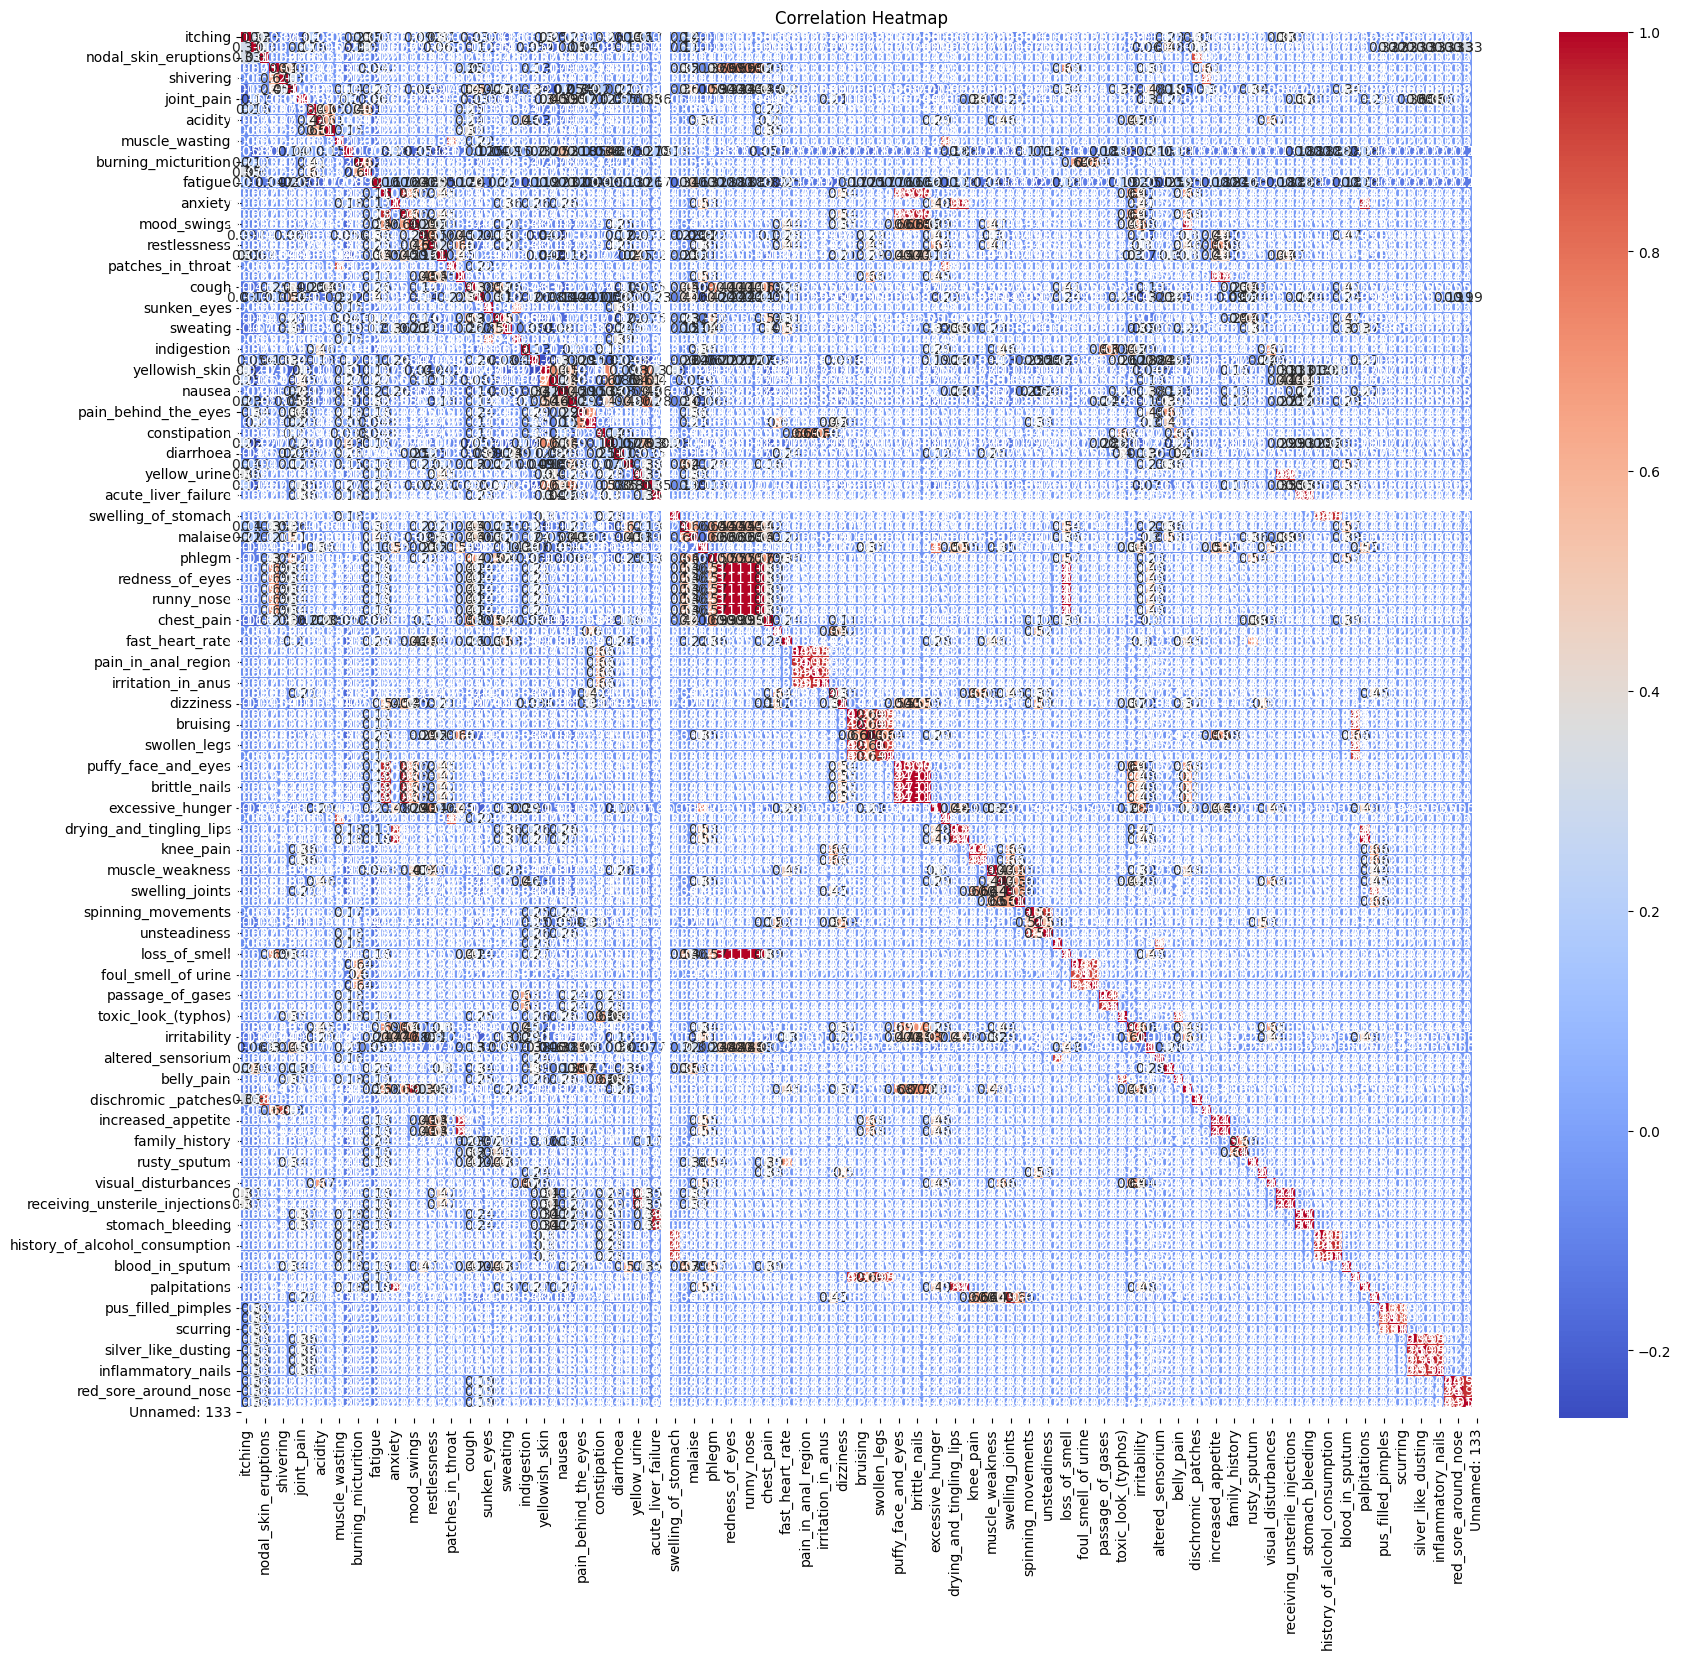

In [14]:
numeric_columns = train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 18))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

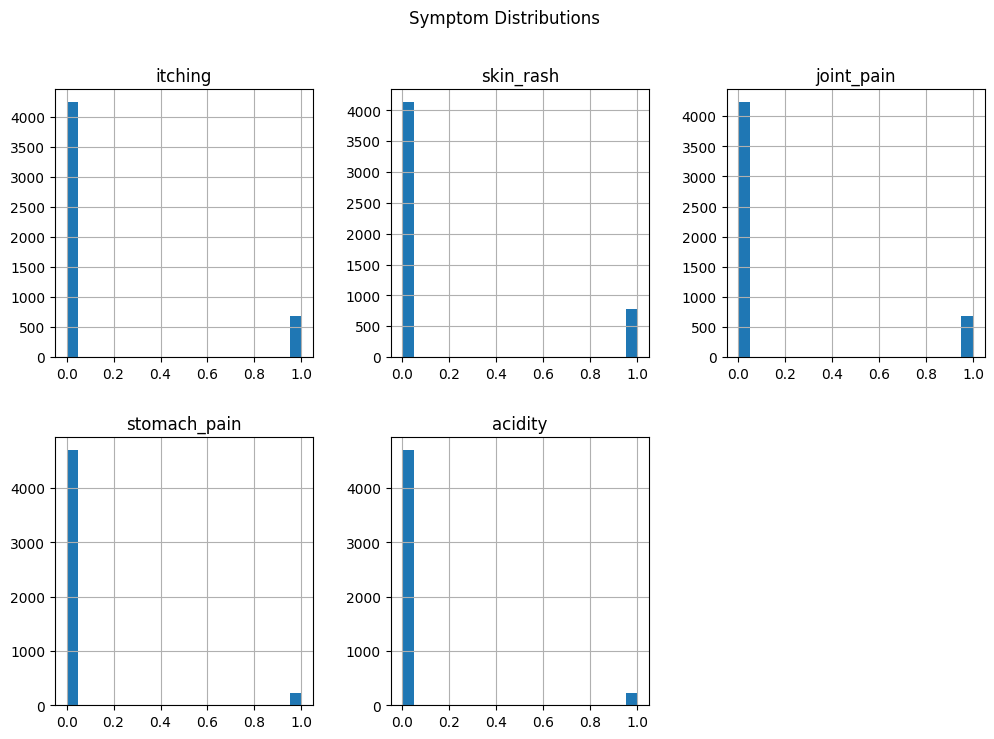

In [15]:
symptoms = ['itching', 'skin_rash', 'joint_pain', 'stomach_pain', 'acidity']
train_df[symptoms].hist(figsize=(12, 8), bins=20, layout=(2, 3))
plt.suptitle("Symptom Distributions")
plt.show()

In [16]:
train_df = train_df.dropna(subset=['prognosis'])

In [17]:
X_train = train_df[['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering',
                    'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'blackheads',
                    'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
                    'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']]


In [18]:
y_train = train_df['prognosis']

In [19]:
X_test = test_df[['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering',
                  'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'blackheads',
                  'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
                  'inflammatory_nails', 'blister', 'red_sore_around_nose', 'yellow_crust_ooze']]


In [20]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor(loss='squared_error', learning_rate=0.5, n_estimators=200, max_depth=10),
    'KNN': KNeighborsRegressor(n_neighbors=6)
}

In [21]:
voting_regressor = VotingRegressor(estimators=[
    ('lr', LinearRegression()),
    ('ridge', Ridge()),
    ('dt', DecisionTreeRegressor()),
    ('rf', RandomForestRegressor()),
    ('gbr', GradientBoostingRegressor(loss='squared_error', learning_rate=0.5, n_estimators=200, max_depth=10)),
    ('knn', KNeighborsRegressor(n_neighbors=6))
])

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    print(f"{name} model trained successfully.")
voting_regressor.fit(X_train, y_train_encoded)
print("Voting Regressor trained successfully.")
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Label Encoder saved as 'label_encoder.pkl'.")


LinearRegression model trained successfully.
Ridge model trained successfully.
DecisionTree model trained successfully.
RandomForest model trained successfully.
SVR model trained successfully.
GradientBoosting model trained successfully.
KNN model trained successfully.
Voting Regressor trained successfully.
Label Encoder saved as 'label_encoder.pkl'.


In [26]:
voting_regressor.fit(X_train, y_train_encoded)
print("Voting Regressor trained successfully.")
joblib.dump(voting_regressor, 'voting_regressor_model.pkl')
print("Voting Regressor model saved as 'voting_regressor_model.pkl'.")
loaded_model = joblib.load('voting_regressor_model.pkl')
test_predictions = loaded_model.predict(X_test)

Voting Regressor trained successfully.
Voting Regressor model saved as 'voting_regressor_model.pkl'.


In [27]:
label_encoder = joblib.load('label_encoder.pkl')
decoded_predictions = label_encoder.inverse_transform(test_predictions.astype(int))

In [28]:
test_df['Predicted_Prognosis'] = decoded_predictions
print("Test data predictions:")
print(test_df[['Predicted_Prognosis']])

Test data predictions:
             Predicted_Prognosis
0                  Drug Reaction
1            Alcoholic hepatitis
2                           GERD
3                    Hepatitis B
4                      Diabetes 
5                    Hepatitis B
6                    Hepatitis B
7                    Hepatitis B
8                    Hepatitis B
9                    Hepatitis B
10                   Hepatitis B
11                       Malaria
12                   Hepatitis B
13                   Hepatitis B
14                   Hepatitis B
15  Paralysis (brain hemorrhage)
16                   Chicken pox
17                 Drug Reaction
18  Paralysis (brain hemorrhage)
19                      Impetigo
20                   Hepatitis B
21                   Hepatitis B
22                      Impetigo
23                      Impetigo
24                   Hepatitis B
25  Paralysis (brain hemorrhage)
26                   Common Cold
27  Paralysis (brain hemorrhage)
28                  

In [29]:
test_df.to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'.")

Predictions saved to 'test_predictions.csv'.


In [30]:
def predict_prognosis(new_data):
    model = joblib.load('voting_regressor_model.pkl')
    label_encoder = joblib.load('label_encoder.pkl')
    encoded_prediction = model.predict([new_data])
    return label_encoder.inverse_transform(encoded_prediction.astype(int))

In [35]:
def get_user_input():
    print("Enter the symptoms as 1 for Yes and 0 for No.")

    itching = int(input("Do you have itching? (1 for Yes, 0 for No): "))
    skin_rash = int(input("Do you have a skin rash? (1 for Yes, 0 for No): "))
    nodal_skin_eruptions = int(input("Do you have nodal skin eruptions? (1 for Yes, 0 for No): "))
    continuous_sneezing = int(input("Do you have continuous sneezing? (1 for Yes, 0 for No): "))
    shivering = int(input("Do you feel shivering? (1 for Yes, 0 for No): "))
    chills = int(input("Do you have chills? (1 for Yes, 0 for No): "))
    joint_pain = int(input("Do you feel joint pain? (1 for Yes, 0 for No): "))
    stomach_pain = int(input("Do you have stomach pain? (1 for Yes, 0 for No): "))
    acidity = int(input("Do you have acidity? (1 for Yes, 0 for No): "))
    ulcers_on_tongue = int(input("Do you have ulcers on your tongue? (1 for Yes, 0 for No): "))
    blackheads = int(input("Do you have blackheads? (1 for Yes, 0 for No): "))
    scurring = int(input("Do you have scurring? (1 for Yes, 0 for No): "))
    skin_peeling = int(input("Is your skin peeling? (1 for Yes, 0 for No): "))
    silver_like_dusting = int(input("Do you have silver-like dusting on your skin? (1 for Yes, 0 for No): "))
    small_dents_in_nails = int(input("Do you have small dents in your nails? (1 for Yes, 0 for No): "))
    inflammatory_nails = int(input("Are your nails inflamed? (1 for Yes, 0 for No): "))
    blister = int(input("Do you have blisters? (1 for Yes, 0 for No): "))
    red_sore_around_nose = int(input("Do you have a red sore around your nose? (1 for Yes, 0 for No): "))
    yellow_crust_ooze = int(input("Is there yellow crust oozing? (1 for Yes, 0 for No): "))


    new_sample = [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering,
                  chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, blackheads,
                  scurring, skin_peeling, silver_like_dusting, small_dents_in_nails,
                  inflammatory_nails, blister, red_sore_around_nose, yellow_crust_ooze]

    return new_sample
new_data = get_user_input()
prediction = predict_prognosis(new_data)
print(f"\nPredicted prognosis: {prediction[0]}")


Enter the symptoms as 1 for Yes and 0 for No.
Do you have itching? (1 for Yes, 0 for No): 1
Do you have a skin rash? (1 for Yes, 0 for No): 0
Do you have nodal skin eruptions? (1 for Yes, 0 for No): 1
Do you have continuous sneezing? (1 for Yes, 0 for No): 0
Do you feel shivering? (1 for Yes, 0 for No): 1
Do you have chills? (1 for Yes, 0 for No): 1
Do you feel joint pain? (1 for Yes, 0 for No): 1
Do you have stomach pain? (1 for Yes, 0 for No): 1
Do you have acidity? (1 for Yes, 0 for No): 0
Do you have ulcers on your tongue? (1 for Yes, 0 for No): 0
Do you have blackheads? (1 for Yes, 0 for No): 0
Do you have scurring? (1 for Yes, 0 for No): 1
Is your skin peeling? (1 for Yes, 0 for No): 1
Do you have silver-like dusting on your skin? (1 for Yes, 0 for No): 1
Do you have small dents in your nails? (1 for Yes, 0 for No): 1
Are your nails inflamed? (1 for Yes, 0 for No): 0
Do you have blisters? (1 for Yes, 0 for No): 0
Do you have a red sore around your nose? (1 for Yes, 0 for No): 1
I

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid f